In [107]:
import pandas as pd
import missingno as msn

In [108]:
file=pd.read_csv("1.csv")

In [109]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Facility ID                            9590 non-null   object 
 1   LGA Name                               9585 non-null   object 
 2   Facility Name                          9590 non-null   object 
 3   Facility_AutoNumber                    9590 non-null   int64  
 4   Street #                               3138 non-null   object 
 5   Street Name                            9511 non-null   object 
 6   Street Type                            9500 non-null   object 
 7   Suburb/Town                            9526 non-null   object 
 8   Pcode                                  9158 non-null   float64
 9   Melway Ref                             4102 non-null   object 
 10  VicRoads Ref                           4140 non-null   object 
 11  Lati

In [110]:
file.columns.values.tolist()

['Facility ID',
 'LGA Name',
 'Facility Name',
 'Facility_AutoNumber',
 'Street #',
 'Street Name',
 'Street Type',
 'Suburb/Town',
 'Pcode',
 'Melway Ref',
 'VicRoads Ref',
 'Latitude',
 'Longitude',
 'Facility Ownership',
 'Facility Purpose',
 'Facility Category',
 'CFA Safer Place?',
 'Access_',
 'FaciltySportPlayedID',
 'Facility ID.1',
 'Sports Played',
 'Number of Field/Courts',
 'Field/Surface Type',
 'Age of Facility',
 'Condition of Facility',
 'Facility Upgrade Age',
 'Changerooms',
 'Facility Features',
 'Spectator numbers for seating/shelter',
 'FullAddress',
 'MelwaysVicRoadsRef']

In [111]:
file.drop(columns=["LGA Name","Facility_AutoNumber",'Street #','Street Type','Melway Ref',"VicRoads Ref"],inplace=True)

In [112]:
file.drop(columns=['Facility Ownership','Facility Purpose','Facility Category','CFA Safer Place?'],inplace=True)

In [113]:
file.drop(columns=['Access_','FaciltySportPlayedID','Facility ID.1','Facility Upgrade Age','MelwaysVicRoadsRef'],inplace=True)

In [114]:
file[file.duplicated()].count()

Facility ID                              15
Facility Name                            15
Street Name                              15
Suburb/Town                              15
Pcode                                    12
Latitude                                 15
Longitude                                15
Sports Played                             4
Number of Field/Courts                    4
Field/Surface Type                        4
Age of Facility                           4
Condition of Facility                     4
Changerooms                               8
Facility Features                         8
Spectator numbers for seating/shelter     1
FullAddress                              15
dtype: int64

In [129]:
file.drop_duplicates(inplace=True)
file[file.duplicated()].count()

Facility ID               0
Facility Name             0
Street Name               0
Suburb/Town               0
Pcode                     0
Latitude                  0
Longitude                 0
Sports Played             0
Number of Field/Courts    0
Field/Surface Type        0
Age of Facility           0
Condition of Facility     0
Facility Features         0
FullAddress               0
dtype: int64

In [116]:
file.drop(columns=["Spectator numbers for seating/shelter","Changerooms"],inplace=True)

<AxesSubplot:>

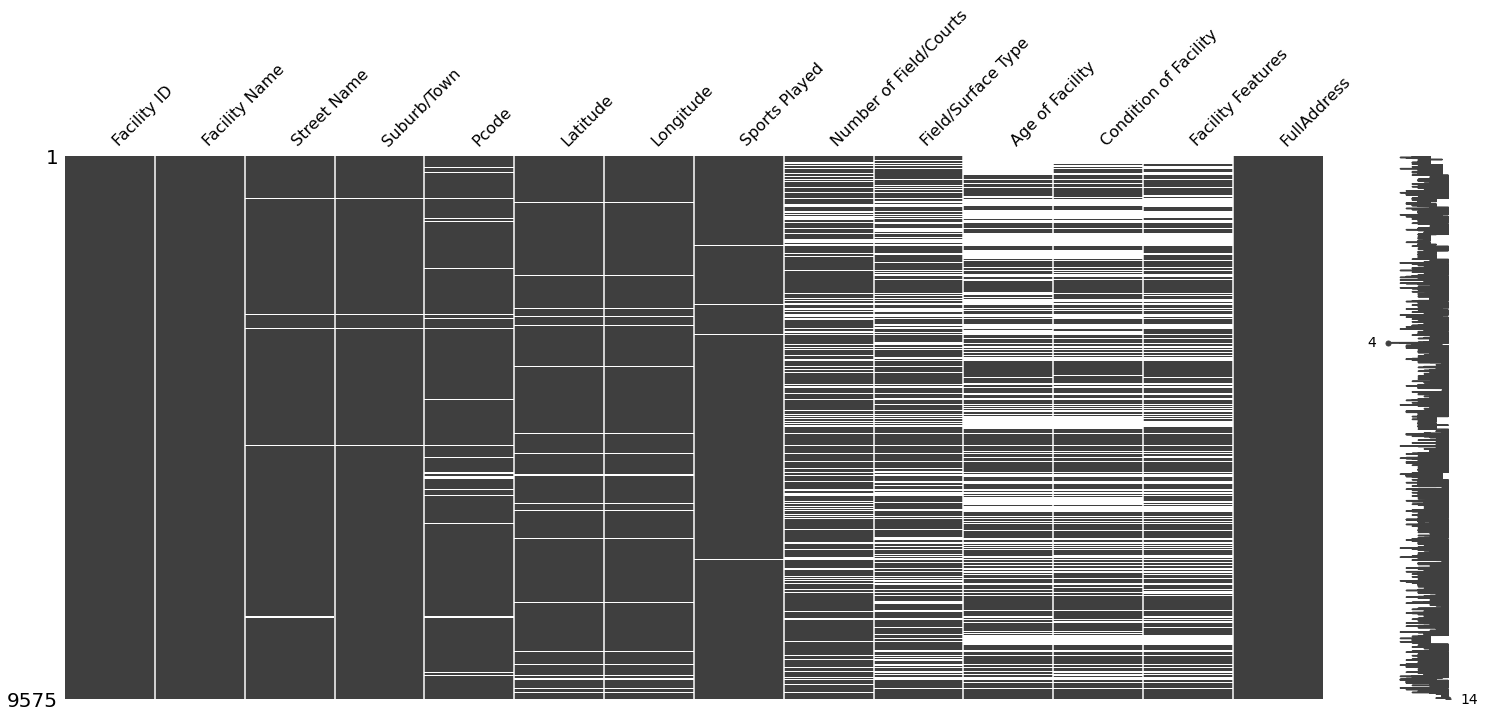

In [117]:
msn.matrix(file)

In [120]:
file.count(axis=0)

Facility ID               9575
Facility Name             9575
Street Name               9496
Suburb/Town               9511
Pcode                     9146
Latitude                  9221
Longitude                 9221
Sports Played             9514
Number of Field/Courts    7793
Field/Surface Type        6810
Age of Facility           5582
Condition of Facility     5881
Facility Features         5963
FullAddress               9575
dtype: int64

In [121]:
file["Pcode"]=file["Pcode"].astype("object")

In [122]:
file=file.dropna(axis=0,how="any",subset=["Latitude","Longitude","Sports Played"])

In [123]:
file=file.fillna("Unknown")

9161

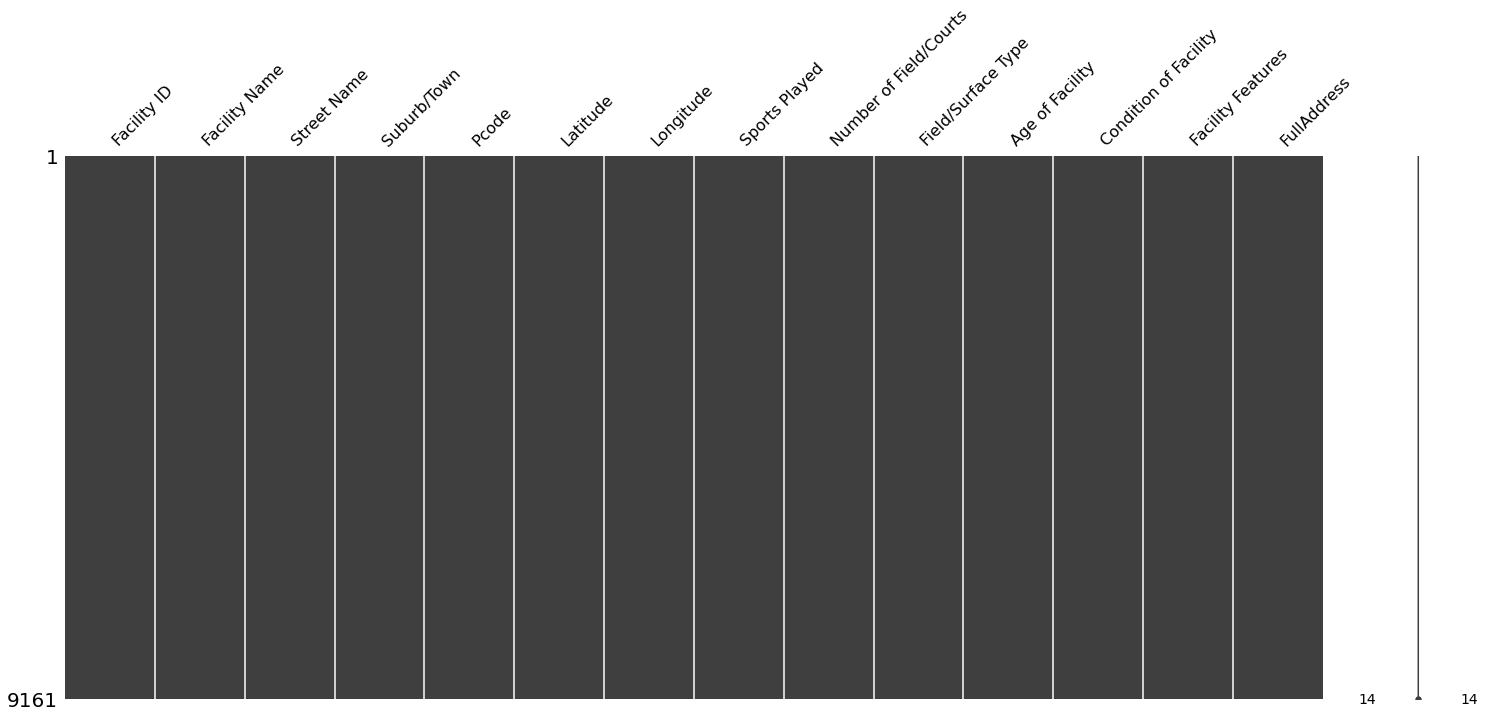

In [124]:
msn.matrix(file)
len(file)

In [136]:
file.to_csv("Sports_Facility_Data_after_wrangling.csv")